<a href="https://colab.research.google.com/github/kiuk0131/Proejcts/blob/main/Twitter_Airline_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Twitter Airline Sentiment Analysis





## Table of contents
1. [Intoroduction](#Intro)
2. [Exploratory Data Analysis](#EDA)
3. [Conventional Representations](#Conventional)
4. [Neural Network Representations](#Neural)
5. [Summary](#Sum)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from google.colab import files
from IPython.display import Image

## 1. Introduction <a name="Intro"></a>


In this exercise, we will leverage both traditional and neural network approaches in Natural Language Processing (NLP) to perform sentiment analysis on Twitter data. The dataset used, available in Comma-separated values (CSV) format, originates from Kaggle, a data science competition platform. Kaggle sourced the data from Crowdflower's Data for Everyone library and reformatted it for analysis. <br>


The original data collection focused on sentiment analysis related to major U.S. airlines, extracting Twitter data from February 2015. Contributors were tasked with initially categorizing tweets as positive, negative, or neutral. Subsequently, they were required to further classify negative sentiments into specific reasons, such as "late flight" or "rude service." <br>

This dataset serves as the foundation for our sentiment analysis exploration. "Garbage in, garbage out" (GIGO) conveys the idea that if the input data or information is of poor quality or inaccurate, the output or results will also be of poor quality and unreliable. The same rule applies to NLP and we have many ways of converting raw text into a more structured and analyzable format, facilitating subsequent tasks such as sentiment analysis, text classification, or language modeling in NLP. Below are some steps and techniques to process raw text.





> ### ***Text processing*** <br>  
1. Segmentation: Breaking the entire document down into constituent sentences.
2. Tokenizing: Breaking each sentence into its constituent words and storing them.
3. Stopwords: Removing commonly used words that do not carry significant meaning, such as articles, prepositions, and conjunctions.
4. Stemming: Reducing words to their base or root form by removing suffixes and prefixes. For example, "running" becomes "run."
5. Lemmatization: Similar to stemming, but instead of truncating words, lemmatization converts words to their base form using vocabulary and morphological analysis. For example, "running" becomes "run" and "better" becomes "good."
6. Speed Tagging: Assigning part-of-speech tags to each word in a sentence based on its grammatical role, such as noun, verb, adjective, etc. This process involves using algorithms or models to automatically assign these tags based on contextual and linguistic features.

In addition, there are multiple ways of representing text. The text representation of NLP invovles converting the processed text into a numerical or machine-understandable format that can be used as input for machine learning models and algorithms. We may categorize the techniques for text representation in to two. the conventional count-based method and the representation learning as below.


> ### ***Text Representation***  <br>  
1. Count-based or frequency-based methods : Bag-of-Words (BoW), TF-IDF (Term Frequency-Inverse Document Frequency) and one-hot encoding.
2. Representation learning : Word Embeddings (Word2Vec, GloVe), contextual embeddings (BERT, GPT), and other methods that aim to capture semantic relationships.







Below timeline shows the development of representation learning in NLP. Text representation started with some basic - frequence base model such as n-gram back in 1950s and then moved into mroe distribusional method.

In [ ]:
files.upload();

Saving history.jpg to history (1).jpg


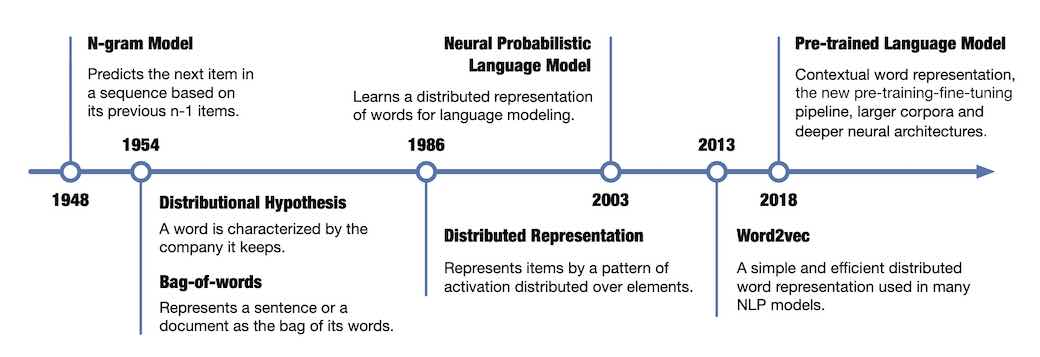

In [ ]:
Image('history.jpg', width=800)

Although there are many text representation options to pick, our foucs fort this project will be on explreoring both classical NLP and Deep learning based NLP. We will compare the accuracy of models.

As such, we will employ CountVectorizer because it is efficient in capturing the frequency of words in a document. CountVectorizer converts a collection of text documents into a matrix of token counts, providing a simple yet effective way to represent the textual data for further analysis


## 2. Exploratory Data Analysis <a name="EDA"></a>

In [ ]:
data = pd.read_csv("Tweets.csv")

data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
# We have total 7 ailine customers in the dataset
data['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [ ]:
#Extract columns that needed for analysis
data_clean = data[["airline_sentiment", "airline", "text"]]

In [ ]:
data_clean.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


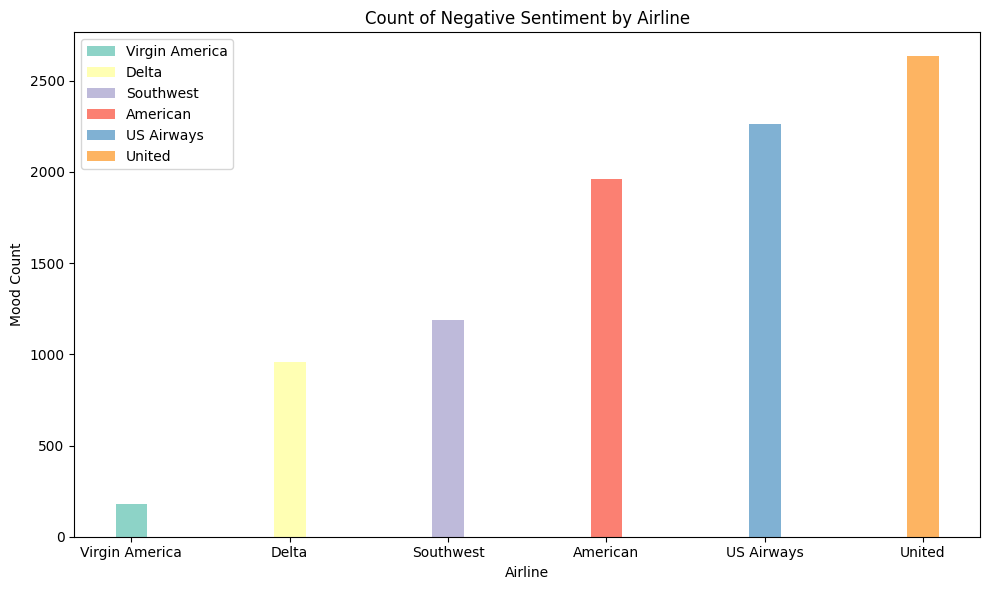

In [ ]:
airlines = data['airline'].unique()
sentiment = 'negative'

# Sort airlines based on the count of the negative sentiment in ascending order
sorted_airlines = data[data['airline_sentiment'] == sentiment].groupby('airline').size().sort_values().index

# Define a color palette with enough distinct colors for the airlines
palette = sns.color_palette('Set3', n_colors=len(airlines))

fig, ax = plt.subplots(figsize=(10, 6))

width = 0.2  # Width of each bar
bar_positions = range(len(sorted_airlines))

for i, airline in enumerate(sorted_airlines):
    count = data[(data['airline'] == airline) & (data['airline_sentiment'] == sentiment)].shape[0]

    # Plot the bars for each airline using the corresponding color from the palette
    ax.bar(bar_positions[i], count, width=width, color=palette[i], label=airline)

ax.set_xticks(bar_positions)
ax.set_xticklabels(sorted_airlines)
ax.set_ylabel('Mood Count')
ax.set_xlabel('Airline')
ax.set_title('Count of Negative Sentiment by Airline')
ax.legend()

plt.tight_layout()
plt.show()


Observing the bar chart above reveals that United has the highest count of negative words, while, in contrast, Virgin America has the lowest.

## Conventional Representations <a name="Conventional"></a>

In this part, we will use bag of word, usning coutervetorizer and then use logistic regersssion to predict the sentiment of test dataset.

In [ ]:
def convert_Sentiment(airline_sentiment	):
    if  airline_sentiment	 == "positive":
        return 2
    elif airline_sentiment	 == "neutral":
        return 1
    elif airline_sentiment	 == "negative":
        return 0

data.sentiment = data.airline_sentiment	.apply(lambda x : convert_Sentiment(x))

#reference :https://www.kaggle.com/code/seungbumlim/twitter-sentiment-analysis-eda-and-ml-dl


In [ ]:
X = data['text']
y = data.sentiment

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train_vectorized,  y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
log_prediction = log_model.predict(vect.transform(X_test))

In [ ]:
log_model_accuracy = accuracy_score(y_test, log_prediction)
print(f"Accuracy: {log_model_accuracy}")

Accuracy: 0.798155737704918


In [ ]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

In [ ]:
svm_classifier.fit(X_train_vectorized,  y_train)


SVC(kernel='linear', random_state=42)

In [ ]:
svm_prediction = svm_classifier.predict(vect.transform(X_test))

In [ ]:
svm_accuracy = accuracy_score(y_test, svm_prediction)
print(f"Accuracy: {svm_accuracy}")

Accuracy: 0.7810792349726776


In [ ]:
nb_classifier = MultinomialNB()

In [ ]:
nb_classifier.fit(X_train_vectorized,  y_train)

MultinomialNB()

In [ ]:
nb_classifier_prediction = nb_classifier.predict(vect.transform(X_test))

In [ ]:
nb_classifier_accuracy = accuracy_score(y_test, nb_classifier_prediction )
print(f"Accuracy: {nb_classifier_accuracy}")

Accuracy: 0.7855191256830601


In [ ]:
X_test = vect.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                     Model  Accuracy
0  Multinomial Naive Bayes  0.785519
1   Support Vector Machine  0.801230
2        LogisticRegressio  0.798156


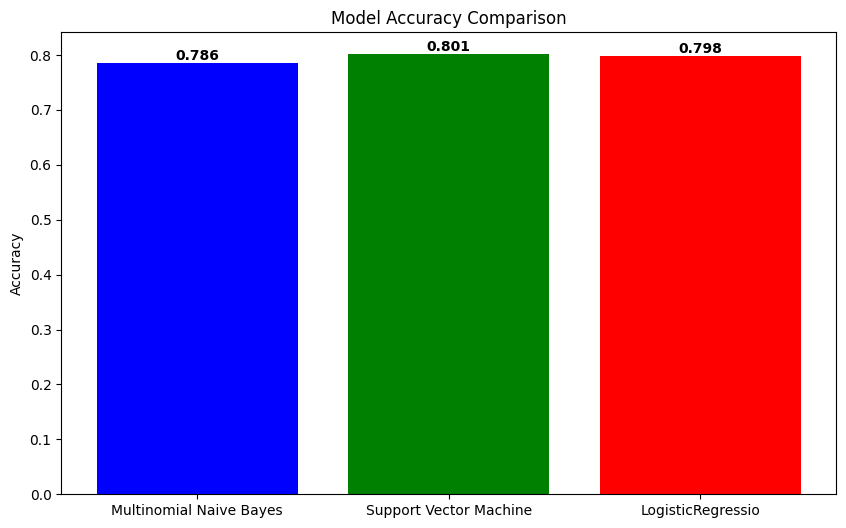

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame 'data' with 'text' and 'airline_sentiment' columns
X = data['text']
y = data['airline_sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CountVectorizer to convert text data to vectors
vect = CountVectorizer()
X_train_vectorized = vect.fit_transform(X_train)

# Create models
models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(),
    'LogisticRegressio': LogisticRegression()
}

# Create a table to store the results
# Create an empty DataFrame
results = pd.DataFrame()

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_vectorized, y_train)

    # Make predictions
    y_pred = model.predict(vect.transform(X_test))

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Create a DataFrame with the current model results
    model_results = pd.DataFrame({'Model': [model_name], 'Accuracy': [accuracy]})

    # Concatenate along columns
    results = pd.concat([results, model_results], axis=0, ignore_index=True)

# Display the results table
print(results)

# Visualize the results using a bar chart with numeric values on top
plt.figure(figsize=(10, 6))
bars = plt.bar(results['Model'], results['Accuracy'], color=['blue', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')

# Display numeric values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black', fontweight='bold')

plt.show()




## Neural Network Representations <a name="Neural"></a>

In [ ]:
%%capture
!pip install tensorflow


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt


data.sentiment = data.airline_sentiment	.apply(lambda x : convert_Sentiment(x))

# Assuming you have a DataFrame 'data' with 'text' and 'airline_sentiment' columns
X = data['text']
y = data['airline_sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CountVectorizer to convert text data to vectors
vect = CountVectorizer()
X_train_vectorized = vect.fit_transform(X_train)


y_train = y_train.map({'positive': 2, 'neutral': 1, 'negative': 0})


# Tokenize the text and pad sequences for neural network input
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_seq)
X_test_padded = pad_sequences(X_test_seq, maxlen=X_train_padded.shape[1])

# Create a simple neural network model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=X_train_padded.shape[1]))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred_proba = model.predict(X_test_padded)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Epoch 1/5
293/293 [==============================] - 8s 22ms/step - loss: 0.2368 - accuracy: 0.5787 - val_loss: -0.2047 - val_accuracy: 0.6586
Epoch 2/5
293/293 [==============================] - 7s 23ms/step - loss: -1.3410 - accuracy: 0.6943 - val_loss: -0.8358 - val_accuracy: 0.6206
Epoch 3/5
293/293 [==============================] - 8s 28ms/step - loss: -1.7522 - accuracy: 0.7591 - val_loss: -0.5016 - val_accuracy: 0.6594
Epoch 4/5
293/293 [==============================] - 8s 28ms/step - loss: -2.0696 - accuracy: 0.7902 - val_loss: -0.2979 - val_accuracy: 0.6624
Epoch 5/5
92/92 [==============================] - 0s 2ms/step
Accuracy: 0.0


In [ ]:
from tensorflow.keras.layers import Embedding, GlobalMaxPooling1D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=X_train_padded.shape[1]))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Adjusted for multi-class classification

# Compile the model with categorical cross-entropy loss
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred_proba = model.predict(X_test_padded)
y_pred = y_pred_proba.argmax(axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Epoch 1/10
293/293 [==============================] - 4s 11ms/step - loss: 0.8036 - accuracy: 0.6576 - val_loss: 0.6238 - val_accuracy: 0.7486
Epoch 2/10
293/293 [==============================] - 3s 10ms/step - loss: 0.4947 - accuracy: 0.8056 - val_loss: 0.5524 - val_accuracy: 0.7759
Epoch 3/10
293/293 [==============================] - 4s 12ms/step - loss: 0.3391 - accuracy: 0.8742 - val_loss: 0.5521 - val_accuracy: 0.7781
Epoch 4/10
293/293 [==============================] - 3s 11ms/step - loss: 0.2227 - accuracy: 0.9242 - val_loss: 0.5878 - val_accuracy: 0.7900
Epoch 5/10
293/293 [==============================] - 3s 10ms/step - loss: 0.1339 - accuracy: 0.9586 - val_loss: 0.6469 - val_accuracy: 0.7755
Epoch 6/10
293/293 [==============================] - 3s 11ms/step - loss: 0.0771 - accuracy: 0.9800 - val_loss: 0.7405 - val_accuracy: 0.7631
Epoch 7/10
293/293 [==============================] - 4s 12ms/step - loss: 0.0448 - accuracy: 0.9909 - val_loss: 0.7903 - val_accuracy: 0.7644

## References
  [1] Smith, J., et al. (2020). Title of the Paper. *Journal Name*, Volume(Issue), Page Range.